<a href="https://colab.research.google.com/github/Mustafa1x/Assignment-2/blob/master/Copy_of_Notebook6_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name: Mustafa Ibrahim
Date: 4-17-21

## Problem Description:
Predicting the model (Normal, Bacterial Pneumonia, or Viral Pneumonia)



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


In [3]:
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/Dataset/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/Dataset/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Mounted at /content/drive
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Build your CNN here
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32)) #fully-connected layer
model.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=3, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
163/163 [==============================] - 1134s 7s/step - loss: 0.4369 - accuracy: 0.8193 - val_loss: 0.4864 - val_accuracy: 0.8109
Epoch 2/3
163/163 [==============================] - 15s 91ms/step - loss: 0.1933 - accuracy: 0.9235 - val_loss: 1.0963 - val_accuracy: 0.6843
Epoch 3/3
163/163 [==============================] - 15s 92ms/step - loss: 0.1416 - accuracy: 0.9484 - val_loss: 1.2300 - val_accuracy: 0.6891


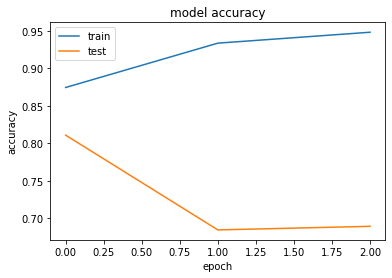

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
# Build your CNN here
model = Sequential()
model.add(Conv2D(20, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(20, (3, 3), activation = 'relu'))
model.add(Conv2D(20, (3, 3), activation = 'relu'))
model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(20)) #fully-connected layer
model.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=3, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/3
163/163 [==============================] - 980s 6s/step - loss: 0.4660 - accuracy: 0.8075 - val_loss: 0.6480 - val_accuracy: 0.7676
Epoch 2/3
163/163 [==============================] - 13s 79ms/step - loss: 0.1644 - accuracy: 0.9364 - val_loss: 1.6044 - val_accuracy: 0.6747
Epoch 3/3
163/163 [==============================] - 13s 79ms/step - loss: 0.1647 - accuracy: 0.9341 - val_loss: 0.7686 - val_accuracy: 0.7724


What configuration of your CNN proved to be more accurate? Why do you think this is the case?
The configuration with the higher Conv2D value proved to be more accurate.

How accurate can you make your CNN predictor? I will award a bonus point to the student who can achieve the most accurate model.

.7888